In [62]:
import numpy as np
from matplotlib import pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split

In [63]:
data_file="MNIST_data.pkl"
# load the data set
with open(data_file,'rb') as infile:
    train_dataset = pickle.load(infile)
X = train_dataset['X']
y = train_dataset['y']

stand_dev = np.std(X, axis=0, keepdims=True)
mean=np.mean(X, axis=0, keepdims=True)
X_normal = (X-mean)/(stand_dev+1e-7)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_normal,y ,random_state=42, test_size=0.5)

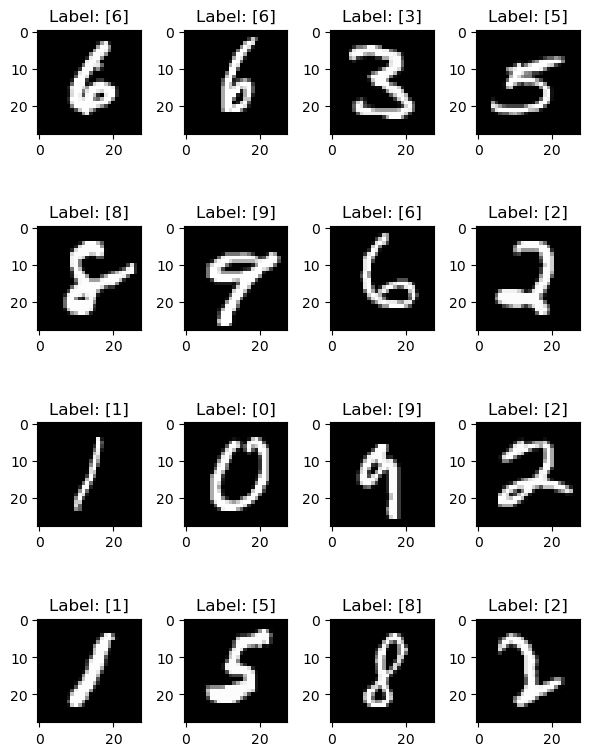

[8]
[9]
[6]
[2]
[8]
[9]
[6]
[2]
[8]
[9]
[6]
[2]
[8]
[9]
[6]
[2]


In [65]:
#display a 4x4 grid
images = []
labels = []
for i in range (16):
    x = random.randint(0,59999)
    images.append(X[x])
    labels.append(y[x])
    
num_row = 4
num_col = 4
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(16):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i].reshape(28,28), cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

for i in range (4):
    for j in range (4):
        print (labels[4*1+j])

In [66]:
#Activation functions
def relu(z):
    return (np.maximum(0,z))

def softmax(z):
    temp = z-np.max(z, axis=1, keepdims=True)
    temp1 = np.exp(temp)
    denominator = np.sum(temp1, axis=1, keepdims=True)
    return temp1/denominator

In [67]:
#weight initiallisation
def init_params(input, mid, out):
    weights1 = 0.01*np.random.randn(input, mid)
    weights2 = 0.01*np.random.randn(mid, out)
    bias1 = 0.01*np.zeros([mid, 1])
    bias2 = 0.01*np.zeros([out, 1])
    
    return(weights1, weights2, bias1, bias2)

In [68]:
#forward propagation
def forward_propg(X_normal, weights1, weights2, bias1, bias2):
    # print("X_Normal: ", X_normal.shape, " Weights1: ", weights1.shape, " bias1: ", bias1.shape)
    z1 = np.dot(X_normal,weights1)+bias1.transpose()
    a1 = relu(z1)
    z2 = np.dot(a1,weights2)+bias2.transpose()
    a2 = softmax(z2)
    
    return(z1,z2,a1,a2)
    

In [69]:
#backward propagation
def back_propg(X_normal, y, weights1, weights2, bias1, bias2, step):
    (z1,z2,a1,a2) = forward_propg(X_normal, weights1, weights2, bias1, bias2)
    #change with z2
    dl_z2 = a2/30000
    for i in range (30000):
        lab = y[i]
        dl_z2[i][lab] = dl_z2[i][lab] - 1/30000
    
    dl_B2 = dl_z2
    dl_b2 = np.sum(dl_B2, axis=0, keepdims=True).T
    dl_w2 = np.dot(a1.transpose(),dl_z2)
    dl_z1 = np.dot(dl_z2, weights2.T)*(z1 > 0)
    dl_w1 = np.dot(X_normal.transpose(),dl_z1)
    dl_B1 = dl_z1
    dl_b1 = np.sum(dl_B1, axis=0, keepdims=True).T
    
    weights1 = weights1 - dl_w1*step
    weights2 = weights2 - dl_w2*step
    bias1 = bias1 - dl_b1*step
    bias2 = bias2 - dl_b2*step
    
    return (weights1, weights2, bias1, bias2)

In [70]:
#cost function
def cost_fxn(X_normal, y, weights1, weights2, bias1, bias2):
    z1,z2,a1,a2 = forward_propg(X_normal, weights1, weights2, bias1, bias2)
    cost = 0
    for j in range (30000):
        cost += -np.log(max(a2[j][y[j]], 1e-12))
    # print("Here ", a2[y[0]].shape)
    cost/=30000
    return cost

In [71]:
def train(X_normal, y, hidden_nodes, epochs=1000, lr=1e-5):
    weights1, weights2, bias1, bias2 = init_params(28*28, 11*11, 10)
    
    for i in range(epochs):
        forward_propg(X_normal, weights1, weights2, bias1, bias2)
        if(i%100 == 0):
            print (cost_fxn(X_normal, y, weights1, weights2, bias1, bias2))
        weights1, weights2, bias1, bias2 = back_propg(X_normal, y, weights1, weights2, bias1, bias2, lr)
    
    return (weights1, weights2, bias1, bias2)

In [72]:
def predict(X_normal, weights1, weights2, bias1, bias2):
    z1,z2,a1,a2 = forward_propg(X_normal, weights1, weights2, bias1, bias2)
    prediction = np.argmax(a2, axis=1)
    return prediction 

In [73]:
def accuracy(predictions, y):
    n=0
    
    for i in range (30000):
        if(predictions[i] == y[i]):
            n = n+1
            
    return n/300

In [74]:
weights1, weights2, bias1, bias2 = train(X_train, y_train, 121, epochs=1000, lr=1)
predictions = predict(X_test, weights1, weights2, bias1, bias2)
print (accuracy(predictions,y_test))

[2.3040667]
[0.11720922]
[0.06282339]
[0.03789563]
[0.02455827]
[0.01697287]
[0.01240371]
[0.00947616]
[0.00749874]
[0.00610943]
96.68


In [75]:
import pickle
import random

roll_num = "22B1058" 
hidden_dim = 121 # replace with your own hidden dimension

model_dict = {
    'z': hidden_dim, # hidden dimension of your model
    'layer_0_wt': weights1, # layer 0 weight (784, z)
    'layer_0_bias': weights2, # layer 0 bias (z, 1)
    'layer_1_wt': bias1, # layer 1 weight (z, 10)
    'layer_1_bias': bias2 # layer 1 bias (10, 1)
}

assert model_dict['layer_0_wt'].shape == (784, hidden_dim)
assert model_dict['layer_0_bias'].shape == (hidden_dim, 1)
assert model_dict['layer_1_wt'].shape == (hidden_dim, 10)
assert model_dict['layer_1_bias'].shape == (10, 1)

with open(f'model_{roll_num}.pkl', 'wb') as f:
    pickle.dump(model_dict, f)

AssertionError: 